# Analyzing Wine Types  and Quality

**Problem Statement :**



### 1 Exploratory Data Exploration

In [0]:
# loading the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
seed = 7
np.random.seed(seed)

In [4]:
# importing the dataset

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Checking the column names

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### 1.1 Checking the presence of missing values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Observation:** There are no missing values 

#### 1.2 Statistical Info about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observation:** All the features  are numerical

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### 1.3 Checking out the class distribution 

In [9]:
df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

### 2 Data Wrangling and Preprocessing

 Segregating the quality class label as follows:

+ Quality Above 7                  = Best
+  Quality Between 5 and 6  = Average
+ Quality below 5                   = Insipid

In [10]:
n_wines = df.shape[0]                  # 0 = rows

# best_quality wines (quality above 6)

quality_above_6 = df.loc[df['quality']> 6]
best_quality = quality_above_6.shape[0]

# bad_quality wines (quality below 5)

quality_below_5 = df.loc[df['quality'] < 5]
bad_quality = quality_below_5.shape[0]

# Average quality wines (quality between 5 and 6)

quality_betwn_5 = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
average_quality = quality_betwn_5.shape[0]

# Precentage of wine with rating above 6

best_wine_percentage = best_quality/n_wines

print('Total no of wines :', n_wines)
print('Wines with ratings 7 and above :', best_quality)
print('Wines with ratings between 5 & 6 :', bad_quality)
print('Wines with ratings below 5 :', average_quality)
print('Percentage of wines with ratings 7 and above :', best_wine_percentage)

Total no of wines : 1599
Wines with ratings 7 and above : 217
Wines with ratings between 5 & 6 : 63
Wines with ratings below 5 : 1319
Percentage of wines with ratings 7 and above : 0.1357098186366479


#### 2.2 Data Visualization with Univariate and Bivariate Analysis

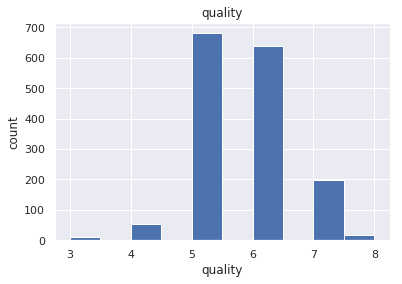

In [11]:
# Distribution of wine quality

df.hist(column = 'quality' )
plt.xlabel('quality')
plt.ylabel('count');

**Observation :** We can see that most of the wines fall in ratings of 5 and 6.

   + i.e **Most of the wines are of average quality**

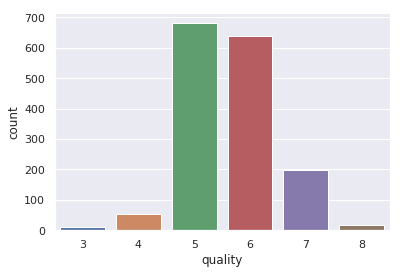

In [12]:
# Distribution of wine quality (Alt.Metod)

sns.countplot(x = 'quality', data =df)

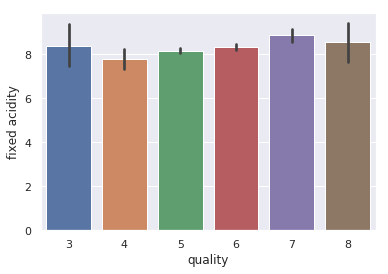

In [13]:
# Checking the relationship between wine quality and fixed acidity

sns.barplot(x = 'quality', y = 'fixed acidity', data = df);

**Observation :** fixed acidity does not have much of a role in wine quality

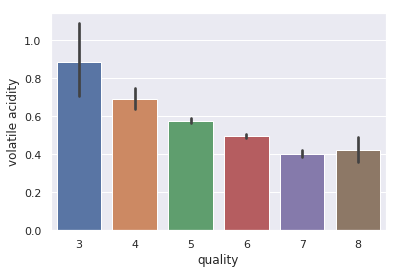

In [14]:
 # Checking the relationship between wine quality and volatile acidity

sns.barplot(x = 'quality', y = 'volatile acidity', data = df);

**Observation :** We see that there is a  downing trend in the volatile acidity as we go higher the quality

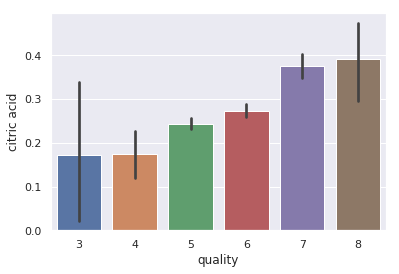

In [15]:
 # Checking the relationship between wine quality and citric acid
    
sns.barplot(x = 'quality', y = 'citric acid', data = df);

**Observation :** Composition of citric acid go higher as we go higher in the quality of the wine

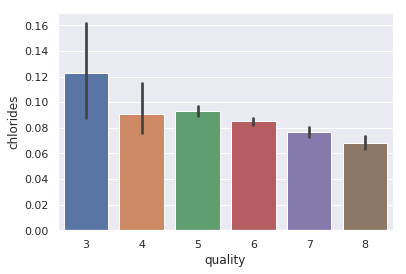

In [16]:
 # Checking the relationship between wine quality and chlorides

sns.barplot(x = 'quality', y = 'chlorides', data = df);

**Observation :** Higher quality wines have lower chloride content

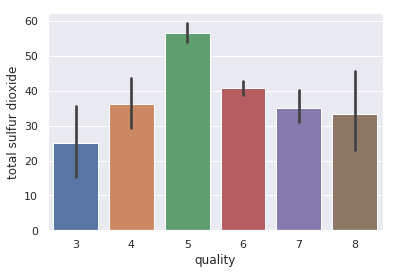

In [17]:
 # Checking the relationship between wine quality and total sulfur dioxide

sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df);

**Observation :** Higher quality wines have lower total sulfur dioxide content

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

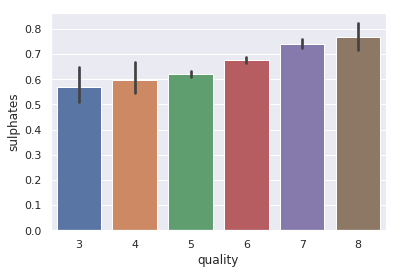

In [19]:
 # Checking the relationship between wine quality and sulphates

sns.barplot(x = 'quality', y ='sulphates', data = df);

**Observation :** Composition of sulphates go higher as we go higher in the quality of the wine

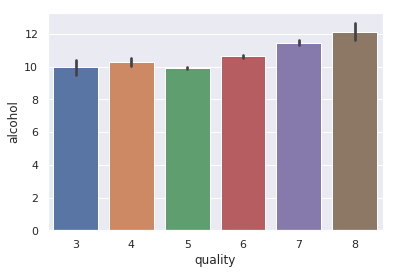

In [20]:
 # Checking the relationship between wine quality and alcohol

sns.barplot(x = 'quality', y ='alcohol', data = df);

**Observation :** Alcohol level also goes higher as te quality of wine increases

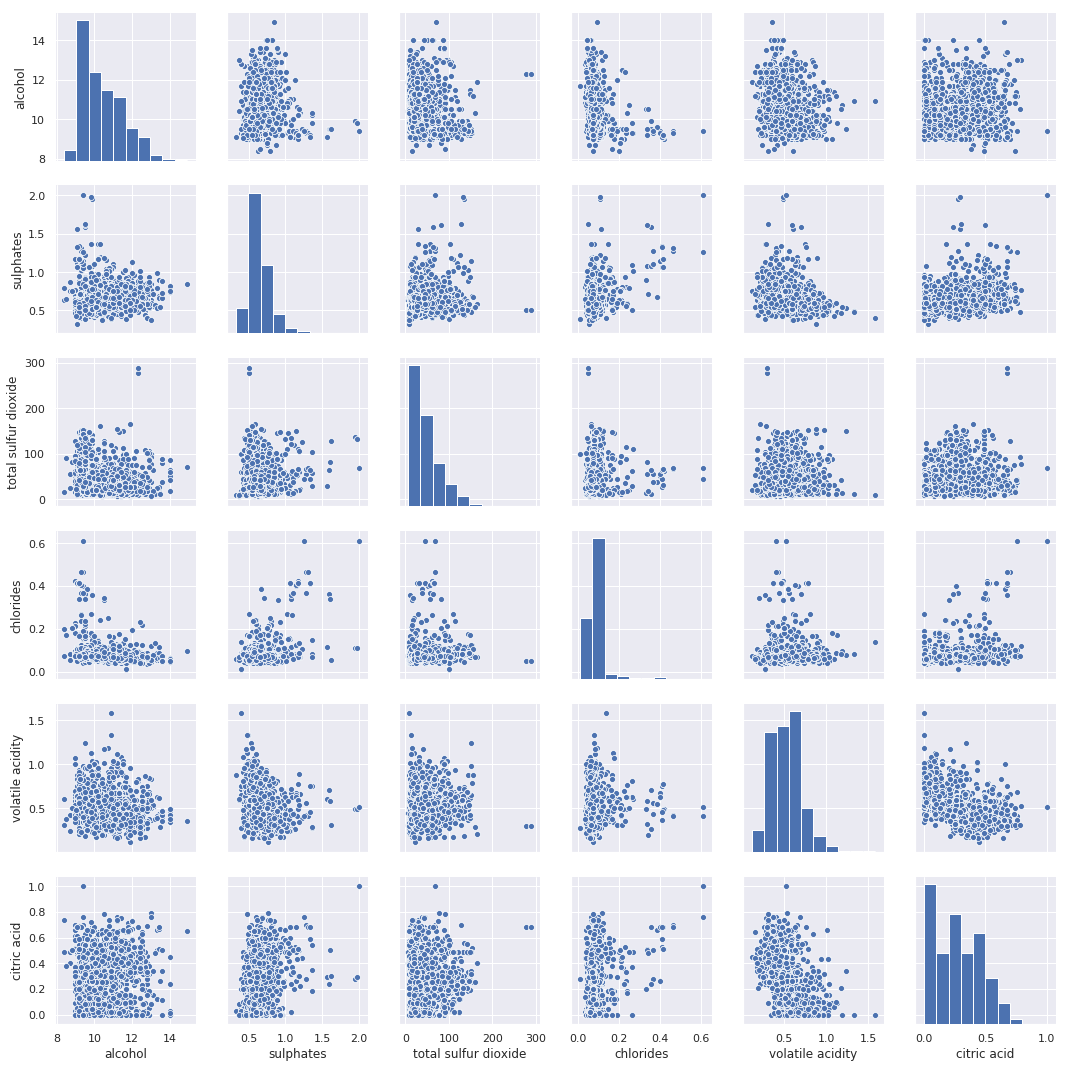

In [21]:
sns.pairplot(df, vars = ['alcohol','sulphates','total sulfur dioxide','chlorides','volatile acidity', 'citric acid' ])

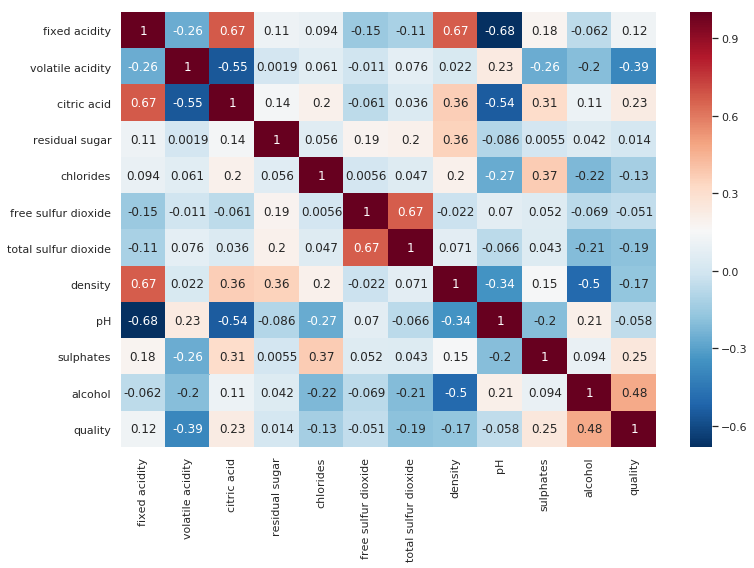

In [22]:
# Plottin a correlation matrix

corr = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(data = corr, cmap = 'RdBu_r', annot = True);

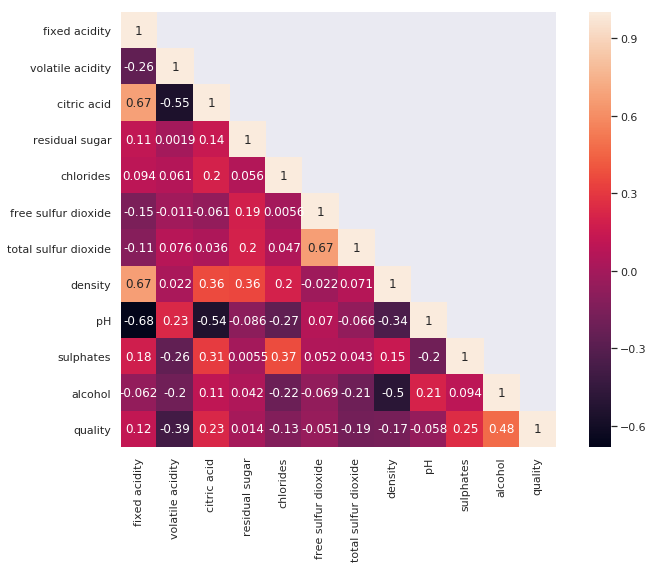

In [23]:
#corelation matrix.(alternate method)

cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True);

**INFERENCES FROM THE ABOVE HEAT MAP :**

- The quality of wine is highly related to volatile acidity.

- Also the quality of wine is highly corelated to alcohol.

- pH and citric acid/ fixed acidity are highly inversely related as all of us know that acids have smaller pH values.

- some other similar inferences can be drawn.

### 3 Outlier Detection

#### 3.1  Tukey’s Method for Detecting Outliers


[link text](https://medium.freecodecamp.org/using-data-science-to-understand-what-makes-wine-taste-good-669b496c67ee)
```
# # For each feature find the data points with extreme high or low values
for feature in data.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], q=25)
 
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], q=75)
 
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
 
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
 
# OPTIONAL: Select the indices for data points you wish to remove
outliers = []
# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)
```



In [24]:
# For each feature find the data points with extreme high or low values
for feature in df.keys():

    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df['fixed acidity'], q=25)
 
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df['fixed acidity'], q=75)
 
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers = []

# Remove the outliers, if any were specified
#good_data = data.drop(data.index[outliers]).reset_index(drop = True)    
    


Data points considered outliers for the feature 'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6


Data points considered outliers for the feature 'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


Data points considered outliers for the feature 'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


Data points considered outliers for the feature 'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5


Data points considered outliers for the feature 'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


Data points considered outliers for the feature 'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9,5


Data points considered outliers for the feature 'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


Data points considered outliers for the feature 'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


Data points considered outliers for the feature 'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


Data points considered outliers for the feature 'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


Data points considered outliers for the feature 'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.100000,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.900000,6
131,5.6,0.500,0.09,2.30,0.049,17.0,99.0,0.99370,3.63,0.63,13.000000,5
132,5.6,0.500,0.09,2.30,0.049,17.0,99.0,0.99370,3.63,0.63,13.000000,5
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
198,5.4,0.835,0.08,1.20,0.046,13.0,93.0,0.99240,3.57,0.85,13.000000,7
210,9.7,0.530,0.60,2.00,0.039,5.0,19.0,0.99585,3.30,0.86,12.400000,6
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.800000,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.600000,8


Data points considered outliers for the feature 'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


#### 3.2 Box Plot Method

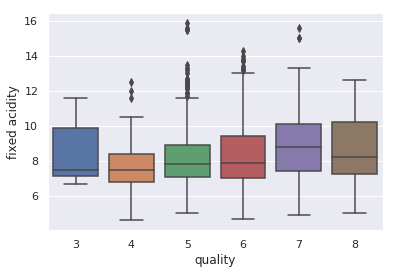

In [25]:
sns.boxplot('quality', 'fixed acidity', data = df)

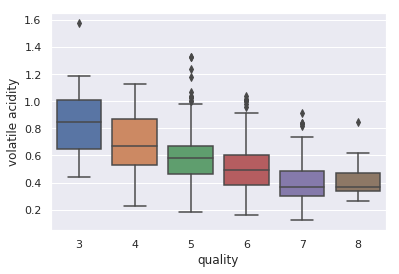

In [26]:
sns.boxplot('quality', 'volatile acidity', data = df)

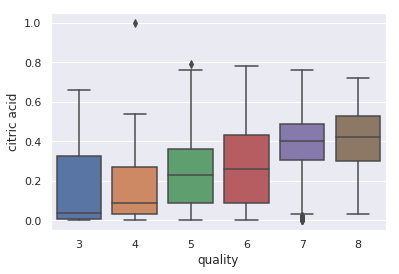

In [27]:
sns.boxplot('quality', 'citric acid', data = df)

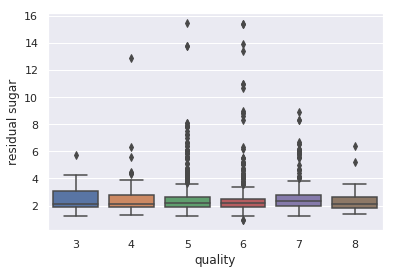

In [28]:
sns.boxplot('quality', 'residual sugar', data = df)

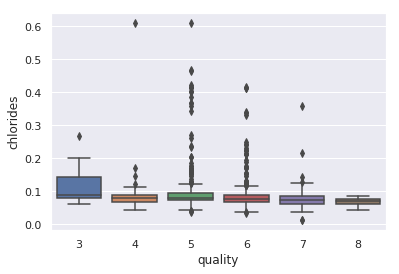

In [29]:
sns.boxplot('quality', 'chlorides', data = df)

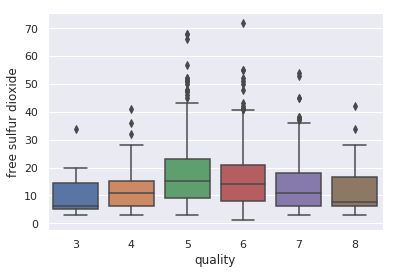

In [30]:
sns.boxplot('quality', 'free sulfur dioxide', data = df)

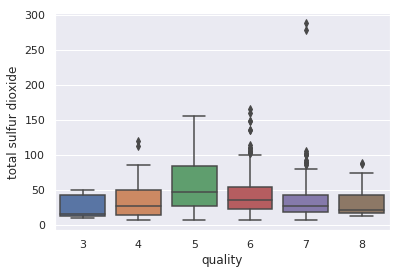

In [31]:
sns.boxplot('quality', 'total sulfur dioxide', data = df)

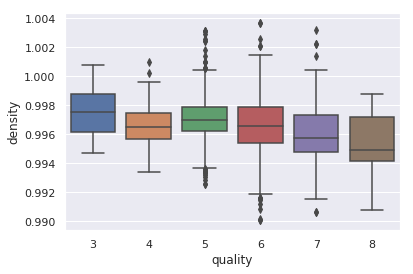

In [32]:
sns.boxplot('quality', 'density', data = df)

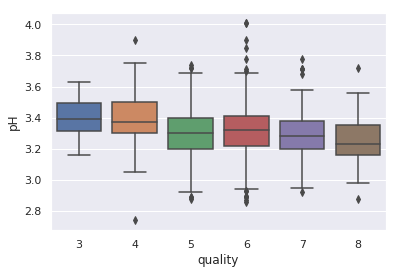

In [33]:
sns.boxplot('quality', 'pH', data = df)

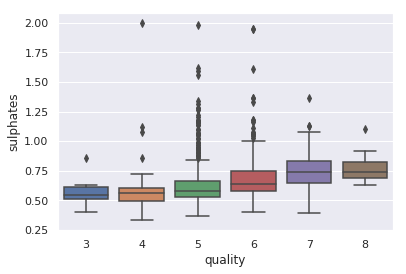

In [34]:
sns.boxplot('quality', 'sulphates', data = df)

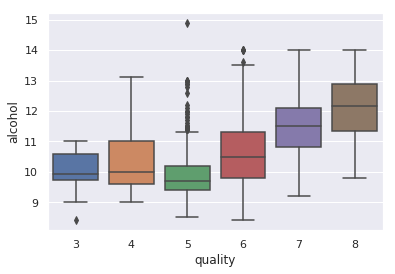

In [35]:
sns.boxplot('quality', 'alcohol', data = df)

In [36]:
# boxplots show many outliers for quite a few columns. 
# Describing the dataset to get a better idea on what's happening

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observations :**

+ fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
+ volatile acididty - similar reasoning
+ citric acid - seems to be somewhat uniformly distributed
+ residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
+ chlorides - same as residual sugar. Min - 0.012, max - 0.611
+ free sulfur dioxide, total suflur dioxide - same explanation as above

### 4 Feature Modelling

#### 4.1 Dealing with the categorical variable - quality

In [0]:
# Creating a new column called Reviews. This column will contain the values of 1,2, and 3. 
 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews

reviews = []
for i in df['quality']:
    if i >=1 and i<= 3:
        reviews.append('1')
    elif i >=4 and i <= 7 :
        reviews.append('2')
    elif i >= 8 and i <= 10 :
        reviews.append('3')
df['reviews'] = reviews


In [38]:
df.groupby('reviews').size()

reviews
1      10
2    1571
3      18
dtype: int64

In [39]:
# Dropping the quality column

df = df.drop(columns= ['quality'], axis = 1)
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,reviews
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2


### 5 Data Preprocessing

#### 5.1 Saperating the features and class variables

In [0]:
# Saperating the features and class labels

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### 5.2 Splitting data in train and test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


#### 5.2 Standardizing the data

In [0]:
# Scaling features (only feature NOT observation)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scaling - brings to range (0 to 1)

#minmax = MinMaxScaler()
#X_Scaled = ScaleFn.fit_transform(X_train)

# Standardise - brings to Zero mean, Unit variance

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6 Feature selection

Feature reduction techniques : [link text](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

#### 6.1 Feature Selection with Univariate Selection (SelectKBest with f_classif)

In [0]:
X_feature_ex = df.iloc[:, :-1]

# since SelectKbBest does not work in the presence of negative values
# hence we use the unscaled data

In [44]:
# applying SelectKBest to extract the top 10 features

bestfeatures = SelectKBest(score_func= f_classif, k=10)
fit = bestfeatures.fit(X_feature_ex, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_feature_ex.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('Top 10 features using SelectKBest :')
print(featureScores.nlargest(10,'Score'))  #print 10 best features


Top 10 features using SelectKBest :
                   Specs      Score
10               alcohol  23.954851
1       volatile acidity  23.580388
7                density   6.757108
9              sulphates   5.156643
2            citric acid   4.773710
4              chlorides   4.257783
6   total sulfur dioxide   3.631537
8                     pH   2.314938
5    free sulfur dioxide   1.668749
0          fixed acidity   0.186140


#### 6.2 Feature Importance using Extra Tree Classifier

[0.09393297 0.11875489 0.08832478 0.10001641 0.08248494 0.05721561
 0.07779915 0.10022643 0.07626644 0.08912281 0.11585557]


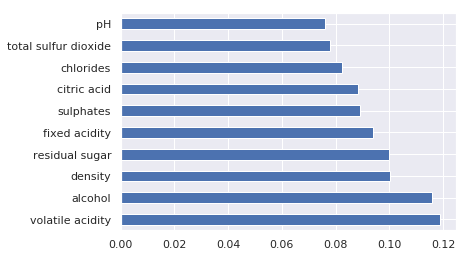

In [45]:
model = ExtraTreesClassifier()
model.fit(X_feature_ex, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X_feature_ex.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### 6.3 Applying PCA

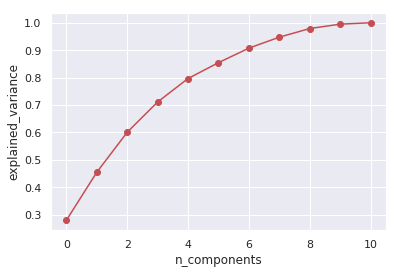

In [46]:
# since PCA is effected by scale and so we must use scaled data for PCA

pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

#plot the graph to find the principal components

#plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('n_components')
plt.ylabel('explained_variance');

**Observation :** We can see that 8 pricipal componentsattribute for 90% of variation in the data. 

In [47]:
# applying PCA with 8 components

pca_new = PCA(n_components= 8)
X_new = pca_new.fit_transform(X_train_scaled)
print(X_new)

[[ 0.98473759  2.49857019  0.66592226 ...  1.00683383  0.29392404
  -0.753917  ]
 [-0.47984368  0.85627662  0.01602597 ...  0.72096738 -0.46861787
   0.29644881]
 [ 2.68865944 -1.62299933 -0.48938023 ... -0.26806076  0.7030515
  -0.83806081]
 ...
 [-0.56720993 -0.7152635  -1.31565215 ... -0.01723539  1.26598062
  -0.04285676]
 [ 1.92698299 -1.24559173  1.06775052 ...  0.08738049  0.16317547
  -1.13318909]
 [-1.03124699  0.43258524 -0.02448581 ... -0.81286612 -0.00623262
   0.74658047]]


### 8 Spot Checking Classification Algorithms

**Classification algorithms we will be using :**

*We will we testing out 6 alogrithms in total. i.e a mixture of linear and non linear models*

+ **Linear Models :** (Logistic Reg & LDA)
+ **Non Linear Models :** (KNN ,CART,NB & SVM)


**We will be using 10 fold cv to estimate the accuracy**


Different way of spot checking algorithms [link text](https://www.kaggle.com/rajmehra03/intro-to-parameter-tuning-in-scikit-acc-0-9175)

LR: 0.981653 (0.008162)
LDA: 0.972479 (0.012384)
KNN: 0.979986 (0.006660)
CART: 0.959972 (0.013831)
NB: 0.940791 (0.019859)
SVM: 0.980819 (0.006503)


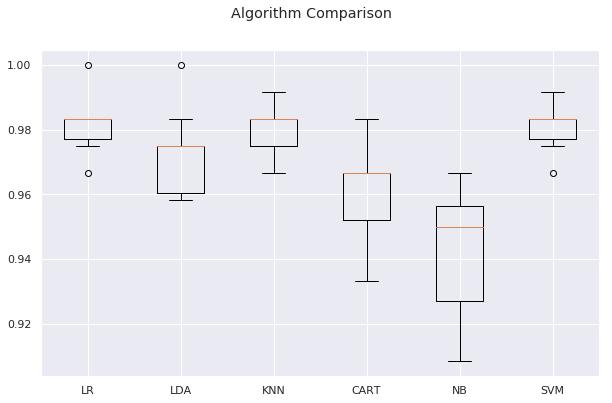

In [48]:
# Spot checking algorithms

models = []
models.append(('LR' , LogisticRegression(solver = 'liblinear' , multi_class = 'auto')))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' ,GaussianNB()))
models.append(('SVM' , SVC(gamma = 'auto')))

# Evaluating models on each turn

results = []
names = []

for name,model in models :
    kfold = KFold(n_splits = 10 , random_state=7)
    cv_results = cross_val_score(model , X_train_scaled, y_train , cv = kfold , scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean() , cv_results.std())
    print(msg)
             
    
# Creating a plot of the model evaluation results to compare the spread and mean accuracy of each model

fig =plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observation :** Logistic Regression seems to give the best performance followed by LDA and KNN
+ Decision Trees do not seem to work well

**We will be working with two algorithms :**
   + **Logistic Regression and SVM**

### 9 Testing out different models with hypertuning of their Parameters

### 9.1) SVM 

#### HyperParameter tuning for SVM

- We can tune two key parameters of the SVM algo viz :
   - a) C-value : how much to relax the margin
   - b) kernel 

In [49]:
# Starting with SVM 
# X_new = pca applied scaled X_train


c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C= c_values , kernel= kernel_values)

model = SVC()
kfold = KFold(n_splits = 10 , random_state= seed)
grid =GridSearchCV(estimator = model , param_grid = param_grid , scoring= 'accuracy' ,cv = kfold)

grid_result = grid.fit(X_train_scaled , y_train)


print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))


Best : 0.980817 using {'C': 0.1, 'kernel': 'linear'}
0.980817 (0.006506) with {'C': 0.1, 'kernel': 'linear'}
0.980817 (0.006506) with {'C': 0.1, 'kernel': 'poly'}
0.980817 (0.006506) with {'C': 0.1, 'kernel': 'rbf'}
0.980817 (0.006506) with {'C': 0.1, 'kernel': 'sigmoid'}
0.980817 (0.006506) with {'C': 0.3, 'kernel': 'linear'}
0.979983 (0.006662) with {'C': 0.3, 'kernel': 'poly'}
0.980817 (0.006506) with {'C': 0.3, 'kernel': 'rbf'}
0.980817 (0.006506) with {'C': 0.3, 'kernel': 'sigmoid'}
0.980817 (0.006506) with {'C': 0.5, 'kernel': 'linear'}
0.979149 (0.006712) with {'C': 0.5, 'kernel': 'poly'}
0.980817 (0.006506) with {'C': 0.5, 'kernel': 'rbf'}
0.980817 (0.006506) with {'C': 0.5, 'kernel': 'sigmoid'}
0.980817 (0.006506) with {'C': 0.7, 'kernel': 'linear'}
0.979149 (0.006712) with {'C': 0.7, 'kernel': 'poly'}
0.980817 (0.006506) with {'C': 0.7, 'kernel': 'rbf'}
0.980817 (0.006506) with {'C': 0.7, 'kernel': 'sigmoid'}
0.979983 (0.006662) with {'C': 0.9, 'kernel': 'linear'}
0.978315 (0

**Observation:**
         -
   - We can see that the best accuracy of **98 %** is attained with parameters **C = 0.1 and kernel = linear**



#### Finalizing the SVM model

In [50]:

model_SVM = SVC(C= 0.1, kernel = 'linear')
model_SVM.fit(X_train_scaled , y_train)
y_pred = model_SVM.predict(X_test)


print('accuracy_score:', accuracy_score(y_test , y_pred))
print('-'*50)
print('Confusion matrix' )
print(confusion_matrix(y_test ,y_pred))
print('-'*50)
print('Classification report :')
print(classification_report(y_test,y_pred))

accuracy_score: 0.9875
--------------------------------------------------
Confusion matrix
[[  0   1   0]
 [  0 395   0]
 [  0   4   0]]
--------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99       395
           3       0.00      0.00      0.00         4

    accuracy                           0.99       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.98      0.99      0.98       400



**Conclusion :** 
   - We have achieved an accuracy score of 98 %

### 9.2 Logistic Regression

####  HyperParameter Tuning For Logistic Regression

- HyperParameters to tune:
   - C value
   - Penalty (l1 or l2)



In [52]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = ['l1','l2']
param_grid = dict(C= c_values , penalty = penalty)

model_LR = LogisticRegression()
kfold = KFold(n_splits = 10 , random_state= seed)
grid =GridSearchCV(estimator = model_LR , param_grid = param_grid , scoring= 'accuracy' ,cv = kfold)

grid_result = grid.fit(X_train_scaled , y_train)


print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))

Best : 0.981651 using {'C': 1, 'penalty': 'l2'}
0.007506 (0.004484) with {'C': 0.001, 'penalty': 'l1'}
0.980817 (0.006506) with {'C': 0.001, 'penalty': 'l2'}
0.980817 (0.006506) with {'C': 0.01, 'penalty': 'l1'}
0.980817 (0.006506) with {'C': 0.01, 'penalty': 'l2'}
0.980817 (0.006506) with {'C': 0.1, 'penalty': 'l1'}
0.980817 (0.006506) with {'C': 0.1, 'penalty': 'l2'}
0.980817 (0.008374) with {'C': 1, 'penalty': 'l1'}
0.981651 (0.008165) with {'C': 1, 'penalty': 'l2'}
0.979983 (0.008496) with {'C': 10, 'penalty': 'l1'}
0.979983 (0.008496) with {'C': 10, 'penalty': 'l2'}
0.979983 (0.008496) with {'C': 100, 'penalty': 'l1'}
0.979983 (0.008496) with {'C': 100, 'penalty': 'l2'}
0.979983 (0.008496) with {'C': 1000, 'penalty': 'l1'}
0.979983 (0.008496) with {'C': 1000, 'penalty': 'l2'}


In [0]:
print('The best hyper parameters for the model are {} with an accuracy score of {} :'.format(grid_result.best_params_,grid_result.best_score_))

#### Finalizing the Logistic regression model

In [57]:
model_LR = LogisticRegression(C= 1, penalty = 'l2')
model_LR.fit(X_train_scaled , y_train)
y_pred = model_LR.predict(X_test)


print('accuracy_score:', accuracy_score(y_test , y_pred))
print('-'*50)
print('Confusion matrix' )
print(confusion_matrix(y_test ,y_pred))
print('-'*50)
print('Classification report :')
print(classification_report(y_test,y_pred))

accuracy_score: 0.9875
--------------------------------------------------
Confusion matrix
[[  0   1   0]
 [  0 395   0]
 [  0   4   0]]
--------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99       395
           3       0.00      0.00      0.00         4

    accuracy                           0.99       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.98      0.99      0.98       400



**Observation :**
- We get an accuracy of 98 %

### 9.3) KNN

#### Hyperparameter tuning for KNN

- HyperParameters to tune:
   - n_neighbours

In [54]:
n_neigh = [i+1 for i in range(50)]
param_grid = dict(n_neighbors = n_neigh)

model_KNN = KNeighborsClassifier()
kfold = KFold(n_splits = 10 , random_state= seed)
grid =GridSearchCV(estimator = model_KNN , param_grid = param_grid , scoring= 'accuracy' ,cv = kfold)
g
rid_result = grid.fit(X_train_scaled , y_train)


print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))

Best : 0.980817 using {'n_neighbors': 7}
0.965805 (0.017644) with {'n_neighbors': 1}
0.971643 (0.010670) with {'n_neighbors': 2}
0.979149 (0.007678) with {'n_neighbors': 3}
0.979983 (0.006662) with {'n_neighbors': 4}
0.979983 (0.006662) with {'n_neighbors': 5}
0.979983 (0.006662) with {'n_neighbors': 6}
0.980817 (0.006506) with {'n_neighbors': 7}
0.980817 (0.006506) with {'n_neighbors': 8}
0.980817 (0.006506) with {'n_neighbors': 9}
0.980817 (0.006506) with {'n_neighbors': 10}
0.980817 (0.006506) with {'n_neighbors': 11}
0.980817 (0.006506) with {'n_neighbors': 12}
0.980817 (0.006506) with {'n_neighbors': 13}
0.980817 (0.006506) with {'n_neighbors': 14}
0.980817 (0.006506) with {'n_neighbors': 15}
0.980817 (0.006506) with {'n_neighbors': 16}
0.980817 (0.006506) with {'n_neighbors': 17}
0.980817 (0.006506) with {'n_neighbors': 18}
0.980817 (0.006506) with {'n_neighbors': 19}
0.980817 (0.006506) with {'n_neighbors': 20}
0.980817 (0.006506) with {'n_neighbors': 21}
0.980817 (0.006506) wit

In [56]:
print('The best hyper parameters for the model are {} with an accuracy score of {} :'.format(grid_result.best_params_,grid_result.best_score_))

The best hyper parameters for the model are {'n_neighbors': 7} with an accuracy score of 0.9808173477898249 :


#### Finalizing the KNN model

In [62]:
model_KNN = KNeighborsClassifier(n_neighbors = 7)
model_KNN.fit(X_train_scaled , y_train)
y_pred = model_KNN.predict(X_test)


print('accuracy_score:', accuracy_score(y_test , y_pred))
print('-'*50)
print('Confusion matrix' )
print(confusion_matrix(y_test ,y_pred))
print('-'*50)
print('Classification report :')
print(classification_report(y_test,y_pred))

accuracy_score: 0.9875
--------------------------------------------------
Confusion matrix
[[  0   1   0]
 [  0 395   0]
 [  0   4   0]]
--------------------------------------------------
Classification report :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.99      1.00      0.99       395
           3       0.00      0.00      0.00         4

    accuracy                           0.99       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.98      0.99      0.98       400



### 10 . Trying out two ensemble methods :
- Gradient Boosting Classifier
- Random Forest

In [0]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

#### Hyperparameter Tuning for Random Forest



- HyperParameters to tune:
   - max_features : auto, sqrt, log2
   

In [67]:
n_estimators = [500]
max_features = ['auto','sqrt','log2']
param_grid = dict(n_estimators = n_estimators, max_features=max_features )

model_RF = RandomForestClassifier()
kfold = KFold(n_splits = 10 , random_state= seed)
grid =GridSearchCV(estimator = model_RF , param_grid = param_grid,
                   scoring= 'accuracy',cv = kfold)

grid_result = grid.fit(X_train_scaled , y_train)


print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))

Best : 0.979149 using {'max_features': 'auto', 'n_estimators': 500}
0.979149 (0.006712) with {'max_features': 'auto', 'n_estimators': 500}
0.979149 (0.006712) with {'max_features': 'sqrt', 'n_estimators': 500}
0.979149 (0.006712) with {'max_features': 'log2', 'n_estimators': 500}


In [66]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}

grid=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), param_grid =params_dict, 
                  scoring='accuracy',cv=kfold)

grid_result = grid.fit(X_train_scaled,y_train)

print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))

Best : 0.979983 using {'max_features': 'sqrt', 'n_estimators': 500}
0.979149 (0.006712) with {'max_features': 'auto', 'n_estimators': 500}
0.979983 (0.006662) with {'max_features': 'sqrt', 'n_estimators': 500}
0.979983 (0.006662) with {'max_features': 'log2', 'n_estimators': 500}


#### Hyperparameter Tuning with Gradient Boosting Decision Tree (GBDT)

- HyperParameters to tune:
   - n_estimators 

In [69]:
params_dict={'n_estimators':[500],}

grid=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid =params_dict, 
                  scoring='accuracy',cv=kfold)

grid_result = grid.fit(X_train_scaled,y_train)

print('Best : %f using %s' % (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean ,stdev, param in zip(means,stds , params):
    print('%f (%f) with %r' % (mean ,stdev , param))

Best : 0.972477 using {'n_estimators': 500}
0.972477 (0.011198) with {'n_estimators': 500}
